In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('data.csv')

In [24]:
def normalize(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    return (data - means) / stds

In [25]:
def predict(m, b, x):
    return m * x + b

In [26]:
def mse(y, y_pred):
    n = len(y)
    return np.mean((y - y_pred) ** 2)

In [27]:
def gradient_descent(m_start, b_start, x, y, lr=0.001, epochs=1000, tol = 1e-6):
    m, b = m_start, b_start
    loss = float('inf')
    
    for epoch in range(epochs):
        y_pred = predict(m,b,x)
        current_loss = mse(y, y_pred)
        
        if abs(loss - current_loss) < tol:
            print(f"Converged after {epoch} epochs")
            break
        
        m_gradient = (-2/len(x)) * np.sum(x * (y - y_pred))
        b_gradient = (-2/len(x)) * np.sum(y - y_pred)
        
        m = m - lr * m_gradient
        b = b - lr * b_gradient
        
        loss = current_loss 
            
    return m, b

In [ ]:
def main():
    x_original = data.SAT.values
    y_original = data.GPA.values
    
    x_normalized = normalize(x_original)
    y_normalized = normalize(y_original)
    
    m, b = gradient_descent(0, 0, x_normalized, y_normalized, lr=0.0001, epochs=10000)
    
    y_pred = predict(m, b, x_normalized)
    loss = mse(y_normalized, y_pred)
    
    x_input = [1567, 1983, 1245, 2134, 1678, 1892, 1456, 2267, 1321, 2045, 1789, 1923, 1543, 2187, 1654, 1976, 1421, 2289, 1387, 2076]
    x_input = normalize(x_input)

    y_input = []

    for i in x_input:
        y_input.append(predict(m, b, i))
    
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    
    plt.scatter(x_normalized, y_normalized, color='red', label='Data Points')
    plt.scatter(x_input, y_input, color='green', label='Input Points')
    x_range = np.linspace(x_normalized.min(), x_normalized.max(), 100)
    y_range = predict(m, b, x_range)
    
    plt.plot(x_range, y_range, color='blue', label='Regression Line')
    plt.xlabel('SAT')
    plt.ylabel('GPA')
    
    plt.title('Linear Regression (GPA vs SAT)')
    plt.grid(True)
    plt.legend()
    
    

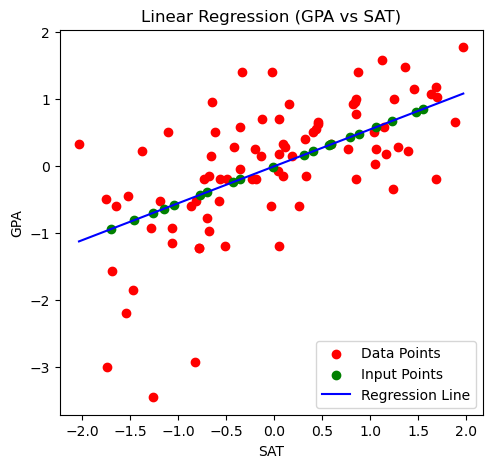

In [41]:
if __name__ == '__main__':
    main()